#Предыдущие результаты, которые понадобятся в этом ноутбуке

In [42]:
import numpy as np  

import seaborn as sns

In [43]:
np.random.seed(3)

Сгенерируем выборку

In [44]:
def linear_func(x):
    target_k = -1
    target_b = 2
    return target_k * x + target_b

In [45]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [46]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.2 1.1 1. ]


In [47]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[2.17886285 1.94365099 1.80964975 1.51365073 1.57226118 1.4645241
 1.39172585 1.23729993 1.19561818 1.0522782  0.86861352]


In [48]:
def MSE_loss(target, predict):
    return ((target - predict)**2).mean()

================================================================================
# Начало скринкаста 6
================================================================================

In [49]:
class OneLinearLearnableNeuron:

    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

        self.n_iter = 50
        self.lr = 0.3
    
    def calc_grad_w(self, x, y):
        return -2 * np.array(y) @ np.array(x) + \
        2 * (self.w @ np.array(x) + self.b) @ np.array(x).T

    def calc_grad_b(self, x, y):
        return -2 * np.array(y) + 2 * (self.w @ np.array([x]) + self.b)

    def calc_loss(self, target, predict):
        return MSE_loss(np.array(target).reshape(1, -1),\
                        np.array(predict).reshape(1, -1))

    def apply(self, x):
        return self.w * np.array(x) + self.b
    
    def train(self, x, y, lr=0.3):
        self.lr = lr
        loss_hist = []
        for i in range(self.n_iter):
            current_predict = [self.apply(np.array(item)) for item in x]
            loss_hist.append(self.calc_loss(current_predict, y))
            for item in range(len(x)):
                self.w = self.w - \
                self.lr * self.calc_grad_w([x[item]], [y[item]]) / len(x)
                self.b = self.b - \
                self.lr * self.calc_grad_b([x[item]], [y[item]]) / len(x)
        return loss_hist

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

In [50]:
neuron = OneLinearLearnableNeuron([3], [0])

print(neuron.apply([0]))

print(neuron.calc_grad_w([0], [-2]))
print(neuron.calc_grad_b([0], [-2]))


[0]
0
[4]


[-0.23826251]
Neuron: w = [-0.68083311], b = [1.80423681]


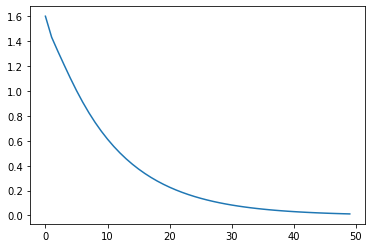

In [51]:
losses = neuron.train(xes, target_ys)

sns.lineplot(
    data=losses
)
print(neuron.apply([3]))

neuron.print_weights()

[-0.6449706]
Neuron: w = [-0.8541363], b = [1.91743829]


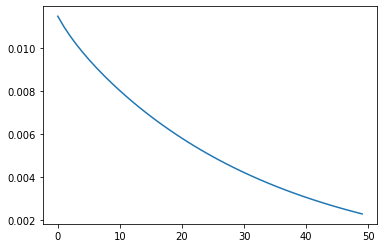

In [52]:
losses = neuron.train(xes, target_ys, lr=0.1)

sns.lineplot(
    data=losses
)
print(neuron.apply([3]))

neuron.print_weights()

================================================================================
# Конец скринкаста 6
================================================================================